# **Integrantes:**

*   TINGO BORBOR CARLOS RAUL
*   BAZURTO LAJE FERNANDO SEBASTIAN
*   GARAY BRAVO JOSE ALBERTO
*   MACIAS RAMOS LISKEYLA WALESKA


Se importan las librerías necesarias para el análisis.  
`pandas` y `numpy` sirven para manejar los datos, y `matplotlib` para crear las gráficas.

In [2]:
#Importacion de librearias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Se carga el archivo CSV con separador ";" para poder manejar los datos

In [5]:
#Lectura del dataset en formato CSV
df = pd.read_csv('PFDA_bank_campaigns.csv', sep = ';')


Se obtiene información general del dataframe para poder conocer que datos tratamos, las dimensiones que este tiene como por ejemplo 41 mil filas y 18 columnas.

# **¿Qué hay en el dataset?**

In [ ]:
# Mostrar los tipos de datos de cada columna en el DataFrame
display(df.dtypes)

,0
Unnamed: 0,int64
age,float64
job,object
marital,object
education,object
default,object
housing,object
loan,object
contact,object
month,object


In [ ]:
df.shape

(41188, 18)

Usamos `df.head()` para poder tener un poco más de contexto como los datos se comportan de forma visual y saber exactamente con qué tratamos, como un tipo de pre visualización.

In [ ]:
df.head()

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,nr.employed,y
0,0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261.0,1,999,0,nonexistent,5191.0,no
1,1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,149.0,1,999,0,nonexistent,5191.0,no
2,2,37.0,NaN,married,high.school,no,yes,no,telephone,may,mon,226.0,1,999,0,nonexistent,5191.0,no
3,3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,151.0,1,999,0,nonexistent,5191.0,no
4,4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,307.0,1,999,0,nonexistent,5191.0,no


Verificacion de duplicados

Se revisa si existen filas duplicadas dentro del dataset


In [ ]:
duplicados = df.duplicated()
duplicados.sum()

np.int64(0)

No se encontraron registros repetidos, lo cual indica que la base de datos está limpia en ese aspecto

Se identifican columnas con valores faltantes o nulos lo cual nos ayudara para más adelante saber si hace falta limpiar o imputar información en futuras etapas de análisis

In [ ]:
nulls = df.isnull().sum().sort_values(ascending = False)
nulls_percentage = (nulls / len(df)) * 100
nulls_info = pd.DataFrame({'Nulls': nulls, 'Percentage': nulls_percentage})

total_nulls = nulls.sum()
total_percentage_sum = nulls_percentage.sum()
nulls_info.loc['TOTAL'] = [total_nulls, total_percentage_sum]
display(nulls_info)

,Nulls,Percentage
job,2100.0,5.098572
education,1276.0,3.097990
duration,864.0,2.097698
age,576.0,1.398466
Unnamed: 0,0.0,0.000000
marital,0.0,0.000000
housing,0.0,0.000000
loan,0.0,0.000000
contact,0.0,0.000000
default,0.0,0.000000


Porcentaje de datos nulos muy bajos por lo que indica que es una data tratable y manejable con diversos procesamientos de datos.

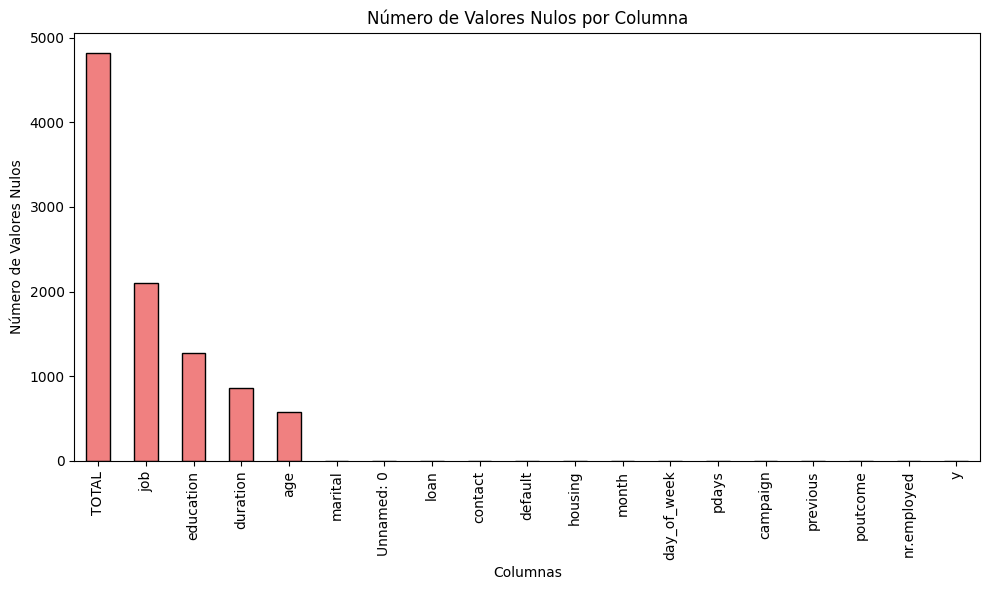

In [ ]:
# Gráfico de barras para mostrar los valores nulos por columna
plt.figure(figsize=(10, 6))
nulls_info['Nulls'].sort_values(ascending=False).plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Número de Valores Nulos por Columna')
plt.xlabel('Columnas')
plt.ylabel('Número de Valores Nulos')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


En este caso, los valores nulos no son en gran cantidad, por lo que se podría decir que la data es manejable en comparación a un dataset del 40% en adelante. Por lo que en consideración es estable para manejar los datos faltantes con diversas técnicas anteriormente dichas.

# Outliers
Se analizan posibles valores atípicos con la regla del IQR (rango intercuartílico).  


In [ ]:
num_colums = ['age', 'duration', 'campaign', 'pdays', 'previous', 'nr.employed']
outlier = []

for i in num_colums:
  Q1, Q3 = df[i].quantile([0.25, 0.75])
  IQR = Q3 - Q1
  Min = Q1 - 1.5 * IQR
  Max = Q3 + 1.5 * IQR
  outliers = ((df[i] < Min) | (df[i] > Max)).sum()
  outlier.append((i, outliers, round(outliers/len(df)*100, 2)))

outlier_df = pd.DataFrame(outlier, columns = ['Columna', 'Outliers', 'Porcentaje'])
outlier_df = outlier_df.sort_values(by='Outliers', ascending=False)
outlier_df

,Columna,Outliers,Porcentaje
4,previous,5625,13.66
1,duration,2898,7.04
2,campaign,2406,5.84
3,pdays,1515,3.68
0,age,461,1.12
5,nr.employed,0,0.00


Al revisar los outliers se notó que las variables `previous`, `duration` y `campaign` tienen los valores más altos, dando a entender que algunas personas fueron contactadas varias veces o tuvieron llamadas mucho más largas que el resto.  
También en `pdays` aparece el valor 999, que solo indica que el cliente no había sido contactado antes.  

# **Propuestas de análisis**





**1. Perfil del cliente que acepta la campaña:**  
Analizar variables como edad, tipo de trabajo, estado civil y nivel educativo para identificar qué tipo de personas tienen mayor probabilidad de aceptar la oferta del banco.

**2. Factores que influyen en el éxito del contacto:**  
Revisar variables como duración de la llamada, mes, día de la semana y tipo de contacto para entender en qué condiciones las campañas logran mejores resultados. para asi aumentar el factor de exito.


# **Análisis del Perfil del Cliente que Acepta la Oferta**

# Distribuciones

Base al pico que tiene la distribución nos percatamos que la mayoría de los clientes tienen entre 30 y 50 años.

* Grupo con más probabilidades de estar en una etapa laboral activa.
*  Grupo más dispuesto a considerar productos financieros.
*  A partir de los 50 años, la tasa disminuye




Para este tipo de análisis se puede concluir que predominan los trabajos administrativos, blue-collar y tecnicos. Siendo los 3 primeros con cantidad (frecuencia) más alta que los demas.



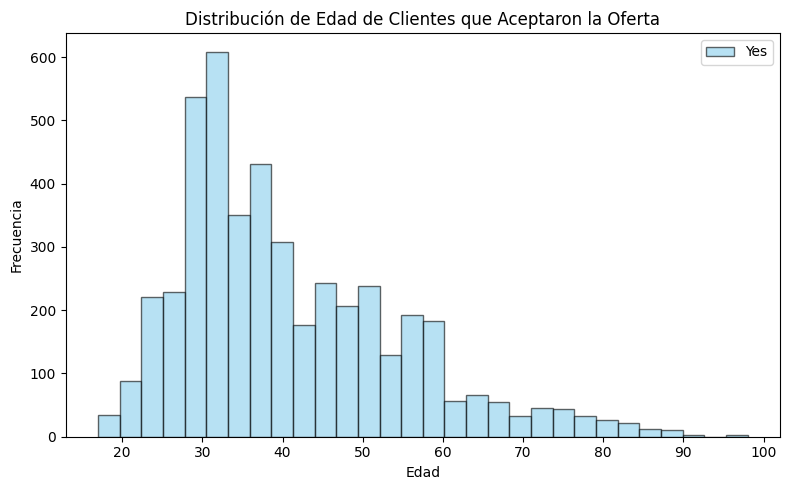

In [ ]:
# Histograma para mostrar la distribución de la edad de los clientes que aceptaron la oferta
plt.figure(figsize=(8, 5))
df[df['y'] == 'yes']['age'].plot(kind='hist', bins=30, alpha=0.6, color='skyblue', label='Yes', edgecolor='black')
plt.title('Distribución de Edad de Clientes que Aceptaron la Oferta')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()
plt.show()


* blue-collar (trabajadores operativos) y administrativos tienen la mayor tasa de aceptación.
* trabajos técnicos también muestran una tasa de aceptación considerablemente alta.
* sectores tienen más estabilidad laboral lo que permite invertir en productos bancarios.
* trabajos menos estables o con menos ingresos (como estudiantes o desempleados) tienden a tener una tasa de aceptación más baja.


/tmp/ipython-input-243999922.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_yes, x='job', palette='Set2', order=df_yes['job'].value_counts().index)


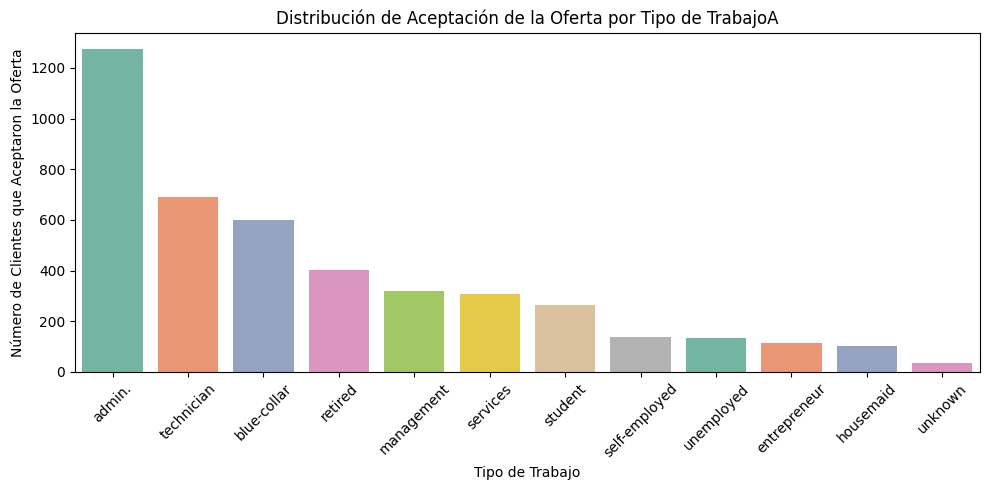

In [6]:
# Filtrar solo los clientes que aceptaron la oferta (y='yes')
df_yes = df[df['y'] == 'yes']

# Gráfico de barras para comparar el tipo de trabajo
plt.figure(figsize=(10, 5))
sns.countplot(data=df_yes, x='job', palette='Set2', order=df_yes['job'].value_counts().index)
plt.title('Distribución de Aceptación de la Oferta por Tipo de TrabajoA')
plt.xlabel('Tipo de Trabajo')
plt.ylabel('Número de Clientes que Aceptaron la Oferta')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


En esta gráfica se observa que la mayoría de los clientes tienen estudios universitarios o de secundaria y el nivel más bajo es “unknown”. Esto indica que la base de clientes del banco tiene en general un nivel educativo medio a alto.
* clientes con educación secundaria y universitaria son los más propensos a aceptar la oferta.
* Los clientes con educación básica también tienen una alta tasa de aceptación,
* La educación influye en la aceptación de la oferta.


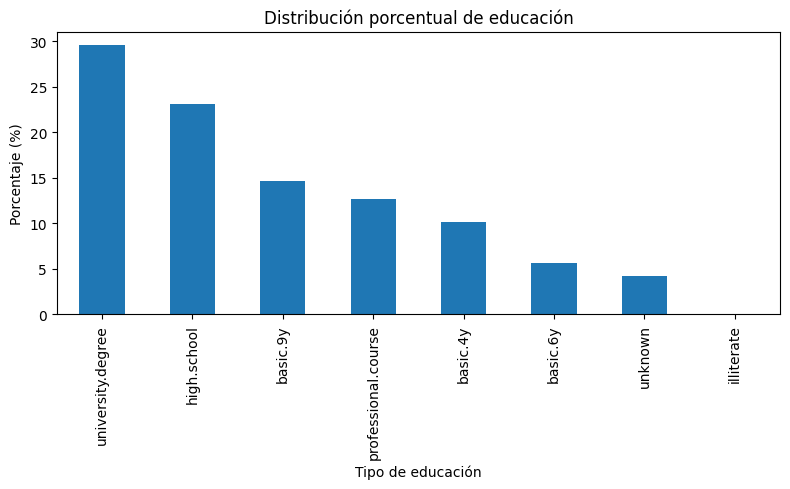

In [ ]:
plt.figure(figsize=(8,5))

# Calculamos porcentaje por categoría
edu_percent = df['education'].value_counts(normalize=True) * 100

# Gráfico de barras en porcentaje
edu_percent.plot(kind='bar', title='Distribución porcentual de educación')

plt.xlabel('Tipo de educación')
plt.ylabel('Porcentaje (%)')
plt.tight_layout()
plt.show()


# **Características de las Llamadas Exitosas**

* ¿Qué características de las llamadas tienen mayor probabilidad de éxito?
* ¿Influye la duración de la llamada, el número de intentos o el tipo de contacto?


## **Duración de llamada:**
* Clientes que aceptan la oferta tienden a tener llamadas más largas.
* Llamadas más largas pueden reflejar un mayor interés y compromiso del cliente  aumenta la probabilidad de aceptación
* Llamadas breves puede reflejar un interés bajo  o pocos convencidos de la oferta.


/tmp/ipython-input-3830816784.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='y', y='duration', palette='Set1')


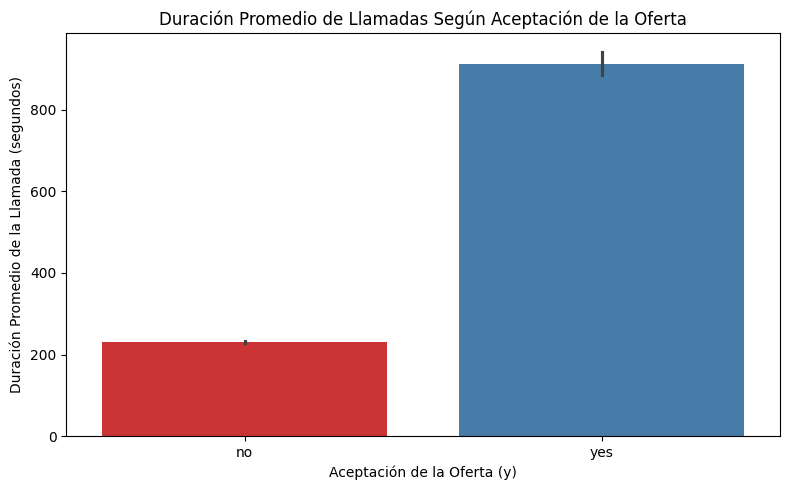

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='y', y='duration', palette='Set1')
plt.title('Duración Promedio de Llamadas Según Aceptación de la Oferta')
plt.xlabel('Aceptación de la Oferta (y)')
plt.ylabel('Duración Promedio de la Llamada (segundos)')
plt.tight_layout()
plt.show()


## **Número de intentos de contacto**

* Relación positiva entre número de intentos y duración de la llamada.
* Llamadas exitosas suelen tener más intentos y mayor duración, sugiriendo que los clientes interesados pasan más tiempo en la conversación.
* Menos intentos pueden ser más efectivos, ya que la mayoría de las llamadas rápidas son rechazadas


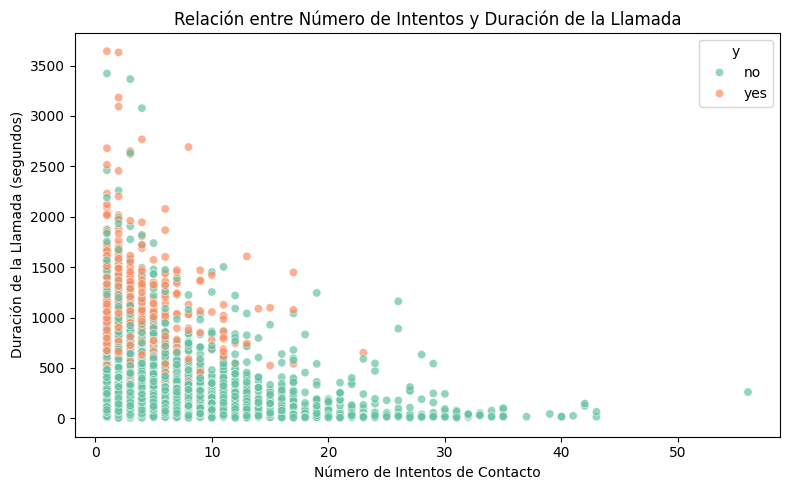

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='campaign', y='duration', hue='y', palette='Set2', alpha=0.7)
plt.title('Relación entre Número de Intentos y Duración de la Llamada')
plt.xlabel('Número de Intentos de Contacto')
plt.ylabel('Duración de la Llamada (segundos)')
plt.tight_layout()
plt.show()


## **Tipo de contacto**

* Las llamadas por celular tienen una tasa de aceptación mucho más alta comparada con el teléfono fijo.
* Mayor efectividad del celular: Las llamadas por celular son más inmediatas y personales, lo que puede aumentar la disposición del cliente a aceptar la oferta.
* Llamadas por teléfono fijo tienen una tasa de aceptación baja y son menos efectivas.



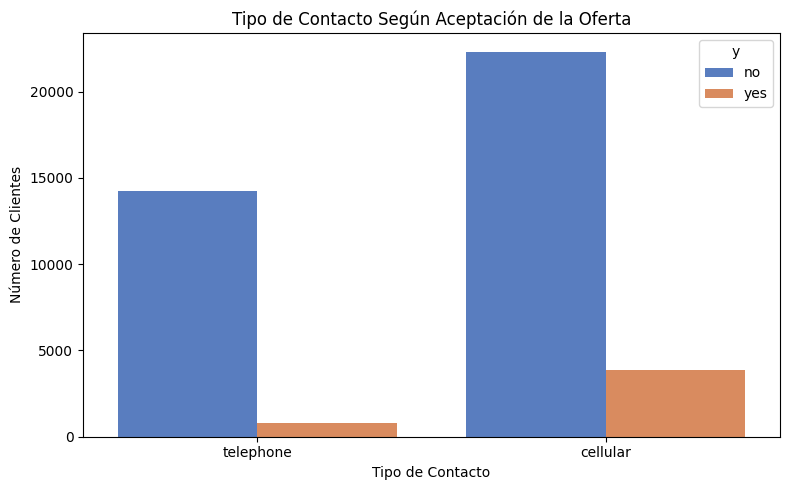

In [ ]:
# Gráfico de barras sobre tipo de contacto (móvil vs fijo)
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='contact', hue='y', palette='muted')
plt.title('Tipo de Contacto Según Aceptación de la Oferta')
plt.xlabel('Tipo de Contacto')
plt.ylabel('Número de Clientes')
plt.tight_layout()
plt.show()


# **Hallazgos**

### **Edad y Tipo de Trabajo**

* Clientes de 30 a 40 años, con trabajos estables son más propensos a aceptar la
oferta.
* Los más jóvenes (20-30 años) también muestran interés, pero su tasa de aceptación es más baja debido a menor estabilidad laboral.


### **Nivel Educativo**


* Clientes con educación secundaria y universitaria tienen una alta probabilidad de aceptar.
* Llamadas por teléfono fijo tienen una tasa de aceptación baja y son menos efectivas.


### **Duración de la Llamada**


* Las llamadas exitosas suelen ser más largas, lo que indica que los clientes comprometidos tienden a dedicar más tiempo al contacto, mostrando un mayor interés en la oferta.


### **Número de Intentos de Contacto:**


* Menos intentos de contacto tienden a ser más efectivos. Los intentos excesivos no aumentan la aceptación y pueden hacer la campaña menos eficiente.


### **Tipo de Contacto**

* El contacto por celular tiene una tasa de aceptación más alta en comparación con el teléfono fijo, ya que los clientes son más receptivos en su móvil.

## **Recomendaciones**

* Dirigir la campaña a clientes de 30–40 años, con trabajos estables
* Son los que muestran mayor tasa de aceptación y mayor interés real en el producto.
* Priorizar clientes con educación secundaria o universitaria
* Realizar campañas para el rango de 20 - 30 años lo cual son una inversión a futuro como clientes potenciales a largo plazo sin esperar a 10 años aproximado.
* Reducir el número de intentos, Reducir recursos en llamadas por teléfono fijo, ya que son mucho menos efectivas.
* Aumentar la calidad de la llamada,Capacitar a los asesores para mantener conversaciones más efectivas y detalladas sin prolongarlas innecesariamente.



###**Conclusión**

El dataset está en buen estado, no tiene duplicados, casi no hay nulos y los outliers se explican por el comportamiento normal de las campañas.  Las gráficas muestran patrones claros en edad, tipo de trabajo y duración de llamadas, lo que ayuda a entender mejor el perfil de los clientes y cómo responden a las ofertas del banco. La campaña funciona mejor con clientes entre 30 y 40 años, con trabajos estables y educación media o alta. Además las llamadas más largas hechas por celular y con pocos intentos, tienen más probabilidades de terminar en un “sí”.
En conjunto, estos factores ayudan a definir con claridad a qué tipo de cliente conviene dirigir la campaña y cómo hacerlo de forma más efectiva.

